### <b><span style='color:#3489c2'>Когда случайный лес не справляется</span></b>

Подчекнем две проблемы случайного леса

- В прошлом модуле мы узнали об **`ансамблировании`** моделей
- Одним из представителей такого подхода является **`случайный лес`**
- `Случайный лес` это **композиция глубоких деревьев**, которые **строятся независимо друг от друга**

<br>

#### **ПРОБЛЕМА 1**

- Обучение **глубоких деревьев требует очень много вычислительных ресурсов**
- Особенно в случае **большой выборки** или **большого числа признаков**
- Если ограничить **глубину решающих деревьев** в случайном лесе, то они уже **не смогут улавливать сложные закономерности в данных**
- Это приведёт к тому, что **сдвиг** (`bias`) будет слишком большим

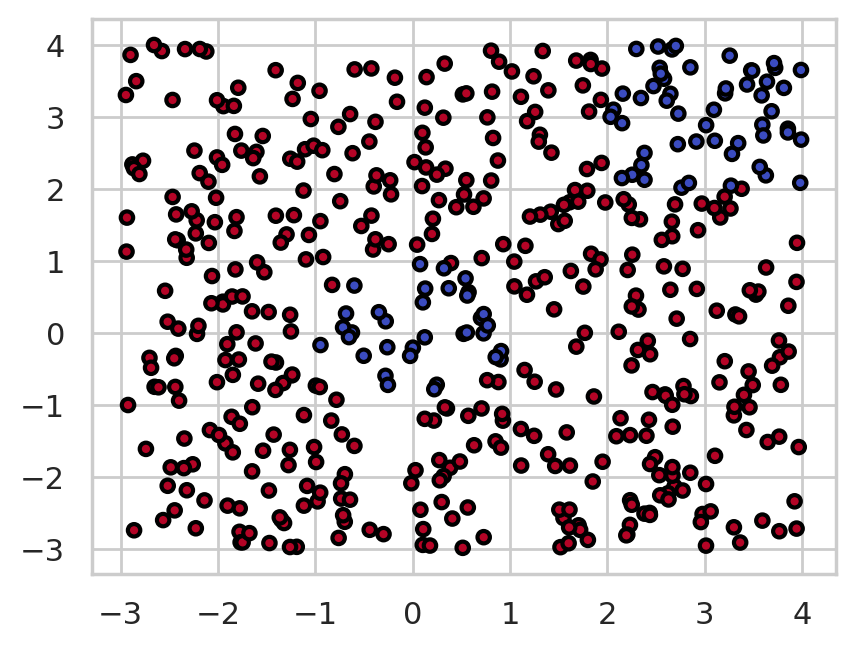

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns; sns.set(style='whitegrid')

def get_labels(data):
    labels = []
    for idx, item in enumerate(data):
        if item[0]**2 + item[1]**2 < 1:
            labels.append(0)
        elif item[0] > 2 and item[1] > 2:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(labels)

N = 500
train_data = 7 * np.random.random_sample((N,2)) - np.array([3,3])
train_labels = get_labels(train_data)

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# мелкий
shallow_rf = RandomForestClassifier(n_estimators=3, max_depth=3, 
                                    n_jobs=-1, random_state=139)

# Глубокий 
deep_rf = RandomForestClassifier(n_estimators=3, max_depth=6, 
                                 n_jobs=-1, random_state=139)

# training the tree
shallow_rf.fit(train_data, train_labels)
deep_rf.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted_shallow = shallow_rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
predicted_deep = deep_rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.scatter(train_data[:, 0],train_data[:, 1], c=train_labels, s=20, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

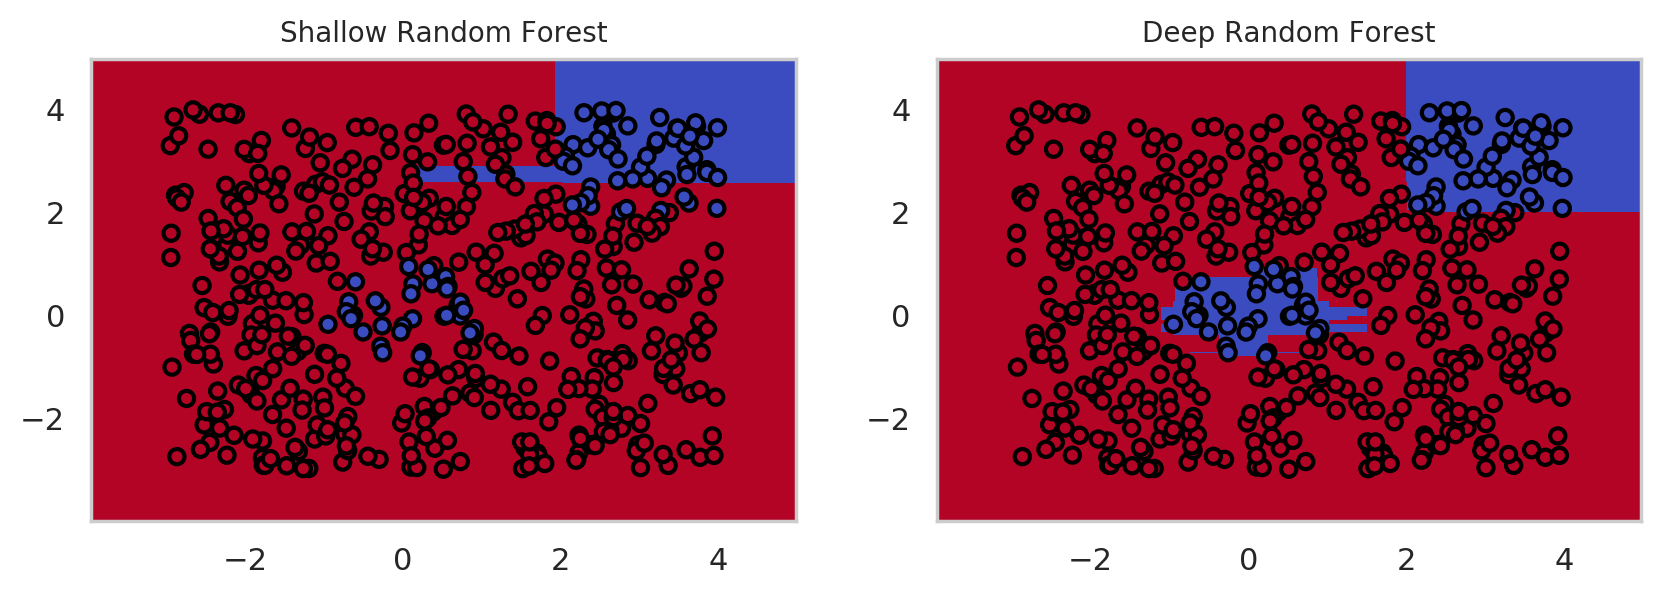

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))

ax[0].pcolormesh(xx, yy, predicted_shallow, cmap='coolwarm')
ax[0].scatter(train_data[:, 0], train_data[:, 1], 
              c=train_labels, s=30, cmap='coolwarm', 
              edgecolors='black', linewidth=1.5);
ax[0].set_title('Shallow Random Forest',size=10)

ax[1].pcolormesh(xx, yy, predicted_deep, cmap='coolwarm')
ax[1].scatter(train_data[:, 0], train_data[:, 1], 
              c=train_labels, s=30, cmap='coolwarm', 
              edgecolors='black', linewidth=1.5);
ax[1].set_title('Deep Random Forest',size=10)
plt.show()

#### **ПРОБЛЕМА 2**


- Процесс построения деревьев является **ненаправленным**
- ie. каждое следующее дерево в композиции **никак не зависит от предыдущих**
- Из-за этого для решения сложных задач **необходимо огромное количество деревьев**